In [15]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

pd.set_option('display.max_columns', 500)
sns.set()

In [23]:
# Players
data = r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_players.csv'
ids = pd.read_csv(data)
ids['name'] = ids['name_first'].str.strip() + ' ' + ids['name_last'].str.strip()
ids = ids.set_index('name')['player_id'].to_dict()

# Ranks
players = ['Roger Federer', 'Pete Sampras'] #, 'Rafael Nadal', 'Novak Djokovic', 'Andy Murray']
players = {k:ids[k] for k in players}

data = [
    r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_rankings_90s.csv', 
    r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_rankings_00s.csv', 
    r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_rankings_10s.csv',
    r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_rankings_20s.csv',
    r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_rankings_current.csv',
]

df = pd.read_csv(data[0], parse_dates=['ranking_date'], dayfirst=False)
df = df[df['player'].isin(players.values())]

for url in data:
    if url != data[0]:
        temp = pd.read_csv(url, parse_dates=['ranking_date'], dayfirst=False)
        temp = temp[temp['player'].isin(players.values())]
        df = pd.concat([df,  temp], axis=0)

df['player'] = df['player'].map({v:k for k, v in players.items()})
df = df.reset_index(drop=True)

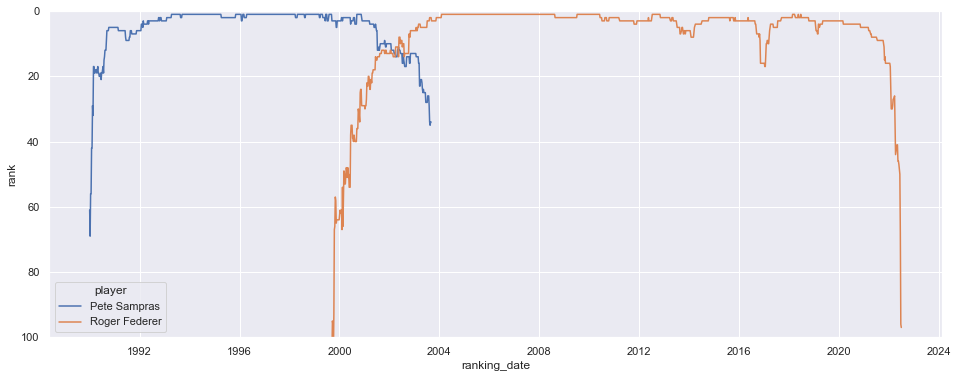

In [24]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x=df['ranking_date'], y=df['rank'], hue=df['player'], ax=ax)
ax.invert_yaxis()
ax.set_ylim(top=0, bottom=100)

plt.show()

In [20]:
# Tour data
data = r'https://raw.githubusercontent.com/DNYFZR/TennisApp/main/data/ATP_tour.csv'
df_tour = pd.read_csv(data, index_col=0, parse_dates=['tourney_date'])

df_tour = df_tour[(df_tour['winner_name'].isin(players)) | (df_tour['loser_name'].isin(players))].copy().reset_index(drop=True)
df_tour['tour_year'] = df_tour['tourney_date'].dt.year
df_tour.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,round_no,atp_points,points_winner,points_loser,sets_played,tour_year
0,1998-314,Gstaad,Clay,32,1,1998-07-06,2,102463,Lucas Arnold Ker,R,180.0,ARG,23.731691,103819,Roger Federer,R,185.0,SUI,16.908966,6-4 6-4,3,R32,80.0,1.0,1.0,62.0,46.0,29.0,9.0,10.0,1.0,3.0,1.0,3.0,74.0,36.0,24.0,15.0,10.0,1.0,5.0,88.0,601.0,702.0,19.0,3.0,250.0,15,5,2,1998
1,1998-327,Toulouse,Hard,32,1,1998-09-28,14,103819,Roger Federer,R,185.0,SUI,17.138946,101703,Guillaume Raoux,R,180.0,FRA,28.618754,6-2 6-2,3,R32,60.0,8.0,0.0,41.0,22.0,18.0,15.0,8.0,1.0,1.0,0.0,0.0,65.0,36.0,22.0,11.0,8.0,4.0,8.0,878.0,9.0,45.0,859.0,3.0,0.0,0,0,2,1998
2,1998-327,Toulouse,Hard,32,1,1998-09-28,23,103819,Roger Federer,R,185.0,SUI,17.138946,101735,Richard Fromberg,R,196.0,AUS,28.418891,6-1 7-6(5),3,R16,85.0,8.0,3.0,73.0,43.0,32.0,18.0,10.0,4.0,4.0,9.0,4.0,75.0,39.0,30.0,16.0,9.0,8.0,10.0,878.0,9.0,43.0,927.0,4.0,0.0,0,0,2,1998
3,1998-327,Toulouse,Hard,32,1,1998-09-28,28,101733,Jan Siemerink,L,183.0,NED,28.457221,103819,Roger Federer,R,185.0,SUI,17.138946,7-6(5) 6-2,3,QF,79.0,5.0,1.0,63.0,43.0,35.0,9.0,10.0,4.0,5.0,3.0,6.0,67.0,39.0,27.0,14.0,10.0,7.0,10.0,20.0,1652.0,878.0,9.0,5.0,0.0,0,0,2,1998
4,1998-328,Basel,Hard,32,1,1998-10-05,5,101736,Andre Agassi,R,180.0,USA,28.435318,103819,Roger Federer,R,185.0,SUI,17.158111,6-3 6-2,3,R32,60.0,4.0,1.0,50.0,24.0,19.0,17.0,9.0,1.0,2.0,4.0,2.0,53.0,31.0,20.0,7.0,8.0,4.0,8.0,8.0,2545.0,396.0,77.0,3.0,500.0,25,20,2,1998


In [22]:
df_tour.groupby(['tour_year', 'winner_name'])['winner_name'].count().sort_values(ascending=False).head(50)

tour_year  winner_name          
2006       Roger Federer            92
2005       Roger Federer            81
2003       Roger Federer            77
2004       Roger Federer            75
2012       Roger Federer            74
2014       Roger Federer            71
2007       Roger Federer            69
2008       Roger Federer            67
2010       Roger Federer            66
2011       Roger Federer            64
2015       Roger Federer            63
2002       Roger Federer            61
2009       Roger Federer            61
2019       Roger Federer            53
2017       Roger Federer            53
2001       Roger Federer            49
2018       Roger Federer            49
2013       Roger Federer            48
2000       Roger Federer            36
2016       Roger Federer            21
1999       Roger Federer            13
2021       Roger Federer             9
2020       Roger Federer             5
2015       Novak Djokovic            5
2011       Novak Djokovic      